# CCT College Dublin
 ## Artificial Intelligence and Data Visualisation & Communication

Student: Charles Franklin Jahn 2020315

Lecturer: David Mcquaid & Sam Weiss

BSc (Hons) in Computing in IT - 4nd Year

04/12/2023 - 05/01/2024

github => https://github.com/CharlesCCT2020315/CA3


In [1]:
#pip install python-constraint

In [2]:
import tkinter as tk
from tkinter import ttk
from constraint import Problem, AllDifferentConstraint
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [3]:
#This plot will show the number of hired vs not hired emplooyes of which solution found
def plot_solution(solutions):
    n=0
    for solution in solutions:
        n= n+1
        hired_candidates = [employee for employee, hire in solution.items() if hire == 1]
        not_hired_candidates = [employee for employee, hire in solution.items() if hire == 0]
        hired_count = len(hired_candidates)
        not_hired_count = len(not_hired_candidates)
        
        labels = ['Hired', 'Not Hired']
        sizes = [hired_count, not_hired_count]
        colors = ['green', 'red']
        
        plt.figure(figsize=(8, 6))
        plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), startangle=140)
        plt.axis('equal')
        plt.title(f'Solution number {n}: Hired vs Not Hired Employees')
        plt.show()

In [4]:
# this plot will display total number of all candidates vs total skills avaiable
def plot_skills(selected_scene):
    skills_count = {}
    total_candidates = len(selected_scene)
    
    # counting Skills
    for candidates in selected_scene.values():
        for skill in candidates:
            if skill in skills_count:
                skills_count[skill] += 1
            else:
                skills_count[skill] = 1

     # setting graph infos
    skills = list(skills_count.keys())
    counts = list(skills_count.values())

    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(skills, counts, color='skyblue')
    plt.xlabel('Skills')
    plt.ylabel('Number of Candidates')
    plt.title('Total Candidates vs Total Each Skills')
    plt.axhline(y=total_candidates, color='red', linestyle='--', label='Total Candidates')
    plt.legend()
    plt.show()

In [5]:
# it will plot a graph based numbers of solutions and max employee of each solution
def update_plot(total_employees_list, total_solutions_list):
    fig, ax = plt.subplots()
    ax.plot(total_solutions_list, total_employees_list, marker='o', linestyle='-')
    ax.set_xlabel('Total Solutions')
    ax.set_ylabel('Total Max Employees')
    ax.set_title('Total Max Employees vs Total Solutions')

    # Update the plot on the GUI
    if hasattr(update_plot, 'canvas'):
        update_plot.canvas.get_tk_widget().destroy()  # delete last plot create, and add the new one
    update_plot.canvas = FigureCanvasTkAgg(fig, root)
    update_plot.canvas.get_tk_widget().grid(row=len(labels) + 4, columnspan=2, padx=10, pady=10)


In [6]:
# Create a problem instance
problem = Problem()

In [7]:
# Define the variables and their respective domains
candidatesScene1 = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'Systems'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Web', 'AI']
}

candidatesScene2 = {
    'Peter': ['Python', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'Systems'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Web', 'AI']
}

In [8]:
def find_solutions():
    selected_scene = candidatesScene1  # set the data for initialy for a scene 1
    if selected_data.get() == "Scene 2": #change dataset when selected
        selected_scene = candidatesScene2
    plot_skills(selected_scene)         
        
    # Get the values from GUI inputs
    max_employees = int(entries[0].get())
    python_programmers = int(entries[1].get())
    ai_engineers = int(entries[2].get())
    web_designers = int(entries[3].get())
    database_admins = int(entries[4].get())
    systems_engineers = int(entries[5].get())

    
    
    # create the problem
    problem = Problem()
    
    # add a variable for each candidate
    for employee in selected_scene.keys():
        problem.addVariable(employee, [0, 1]) # 0 to not hire, 1 to hire
    
    #restriction of max number of new employees
    def max_employees_constraint(*args):
        return sum(args) <= max_employees

    problem.addConstraint(max_employees_constraint, selected_scene.keys())

    # Restriction to the wished skills
    def skill_constraint(skill, count):
        def func(*args):
            return sum(args[i] for i, employee in enumerate(selected_scene.keys()) if skill in selected_scene[employee]) >= count

        return func

    problem.addConstraint(skill_constraint('Python', python_programmers))
    problem.addConstraint(skill_constraint('AI', ai_engineers))
    problem.addConstraint(skill_constraint('Web', web_designers))
    problem.addConstraint(skill_constraint('Database', database_admins))
    problem.addConstraint(skill_constraint('Systems', systems_engineers))

    # Find all possible solutions
    solutions = problem.getSolutions()
    
    num_solutions = len(solutions)

    # counting total of emplooye and total of solution to plot a graph line
    total_employees_list = [sum(solution.values()) for solution in solutions]
    total_solutions_list = list(range(1, len(solutions) + 1))
    
    #call functons for plots
    update_plot(total_employees_list, total_solutions_list)
    
    plot_solution(solutions)
    
    #print solutions on GUI 
    if solutions:
        solution_text = '\n'.join([', '.join([employee for employee, hire in solution.items() if hire == 1]) for solution in solutions])
        result_text.config(state=tk.NORMAL)
        result_text.delete('1.0', tk.END)
        result_text.insert(tk.END, solution_text)
        result_text.config(state=tk.DISABLED)
        
    else:
        result_text.config(state=tk.NORMAL)
        result_text.delete('1.0', tk.END)
        result_text.insert(tk.END, "Solutions not found")
        result_text.config(state=tk.DISABLED)


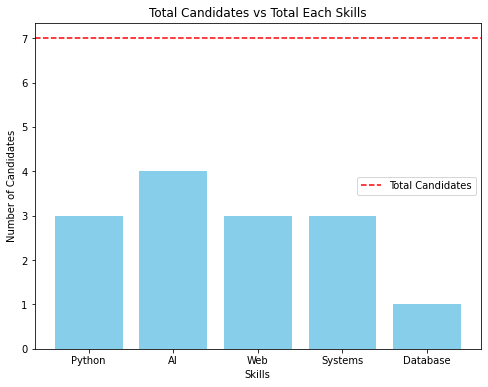

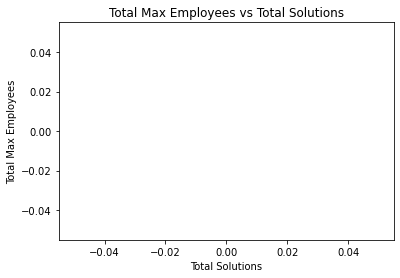

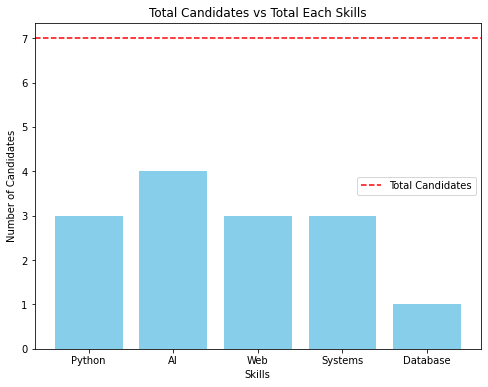

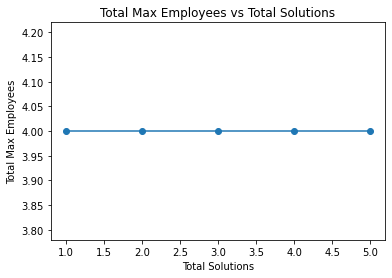

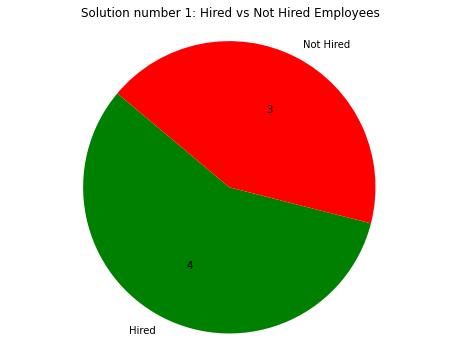

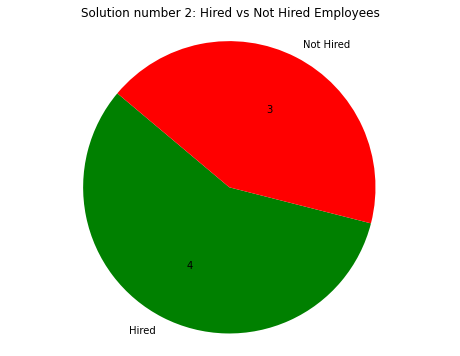

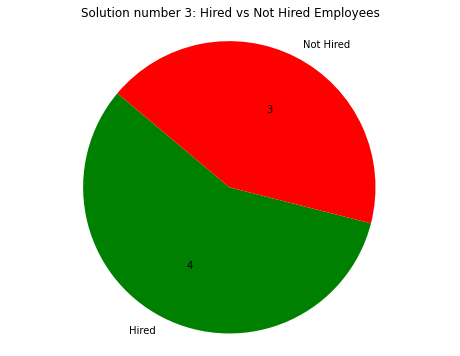

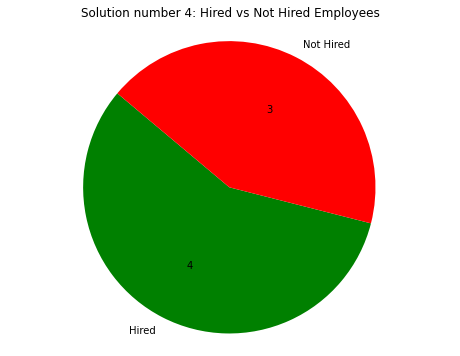

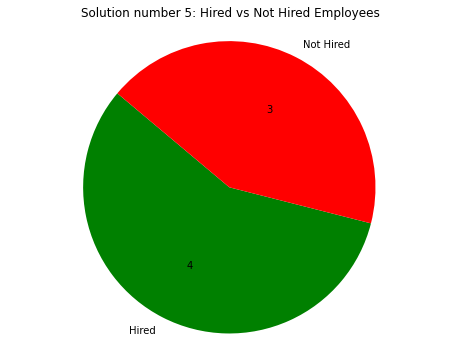

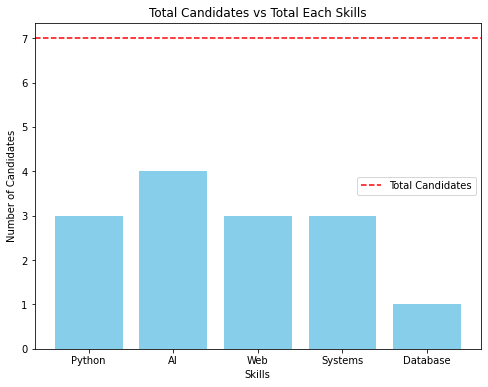

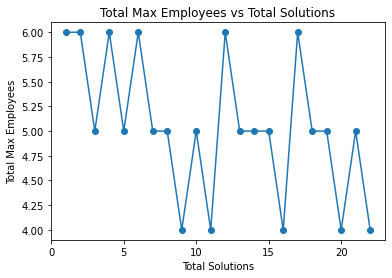

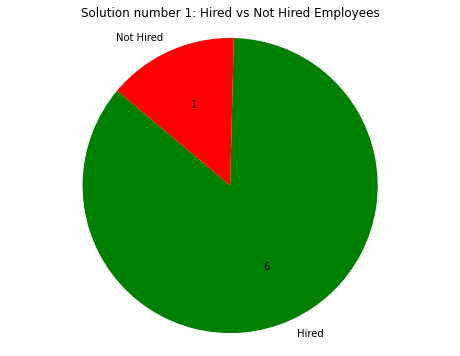

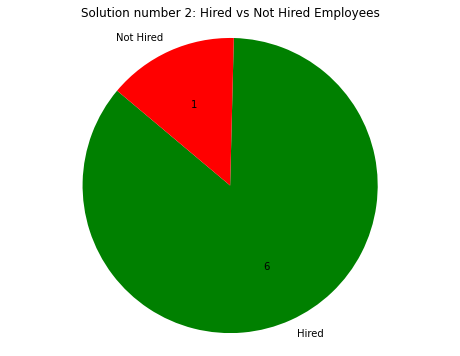

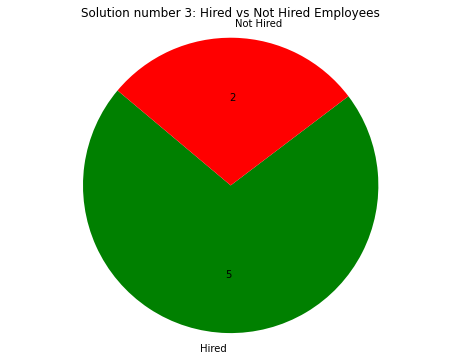

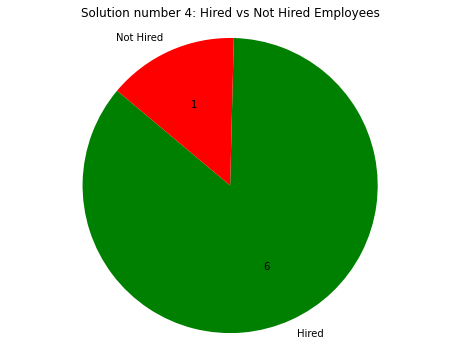

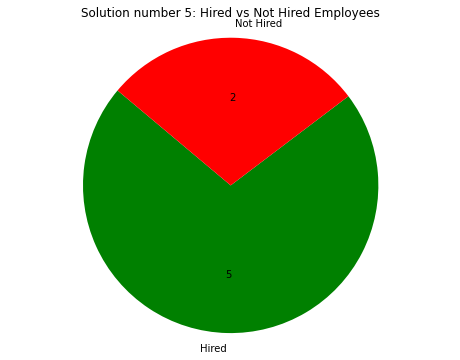

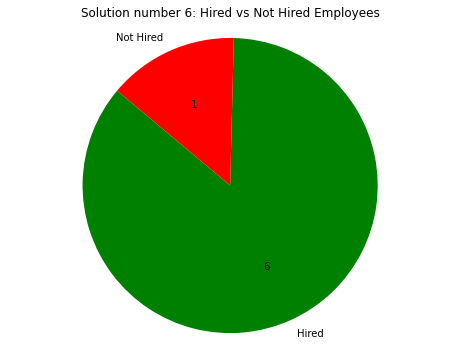

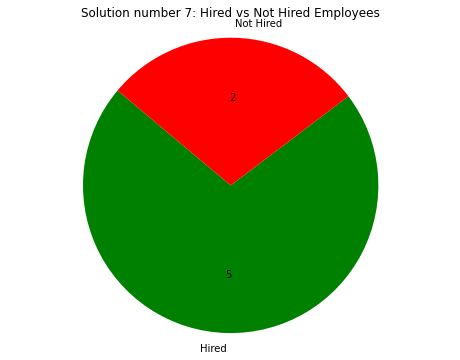

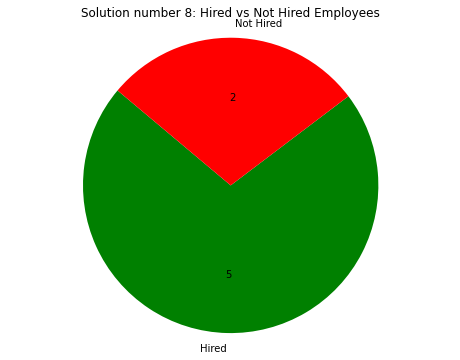

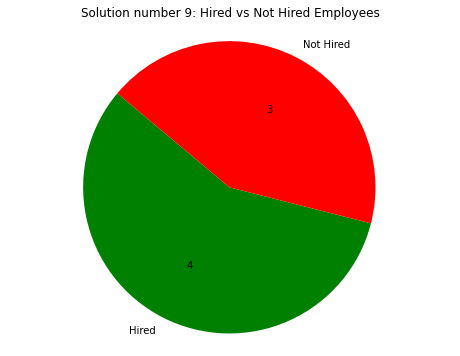

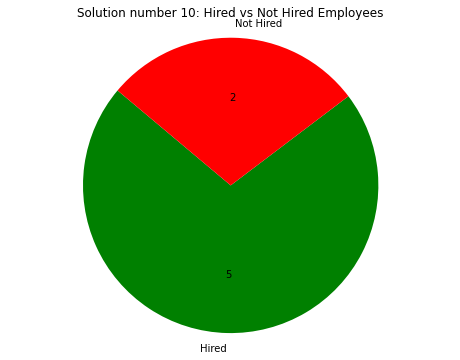

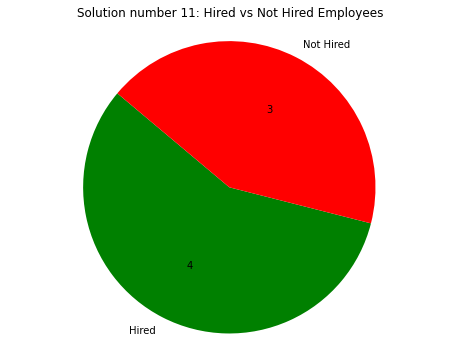

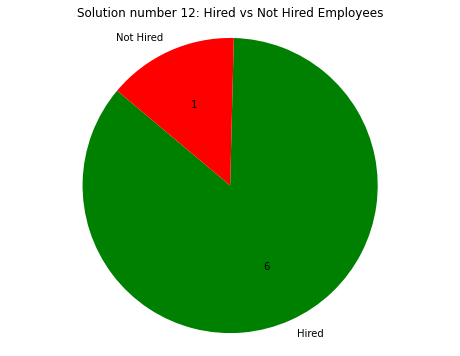

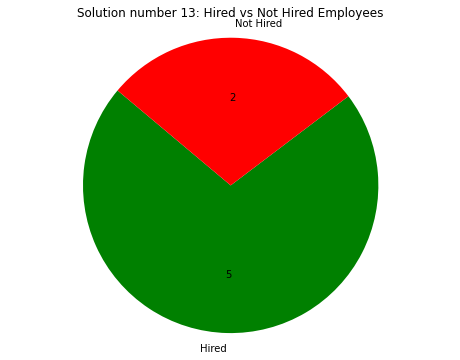

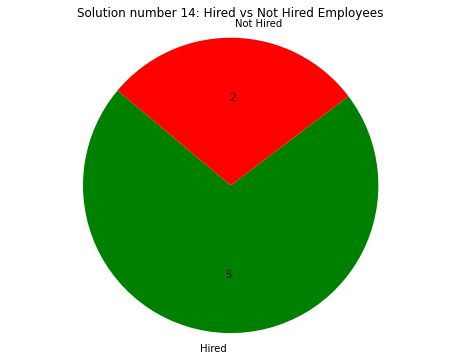

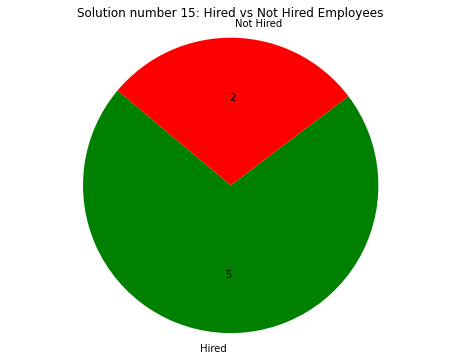

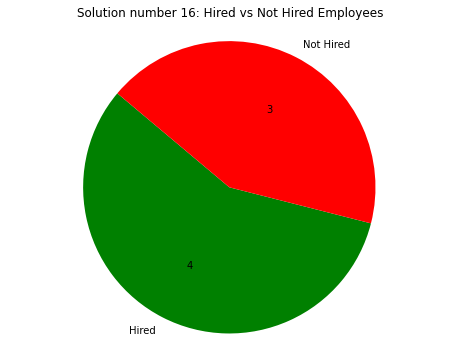

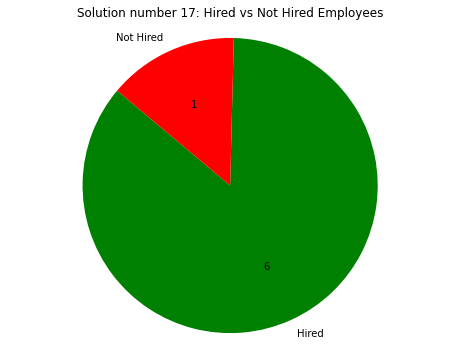

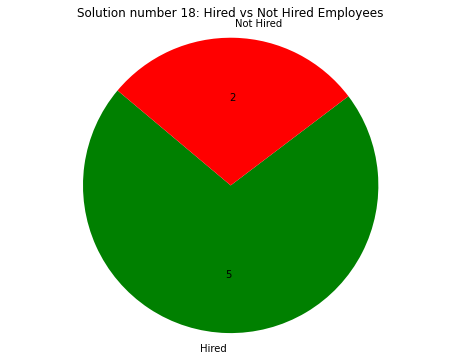

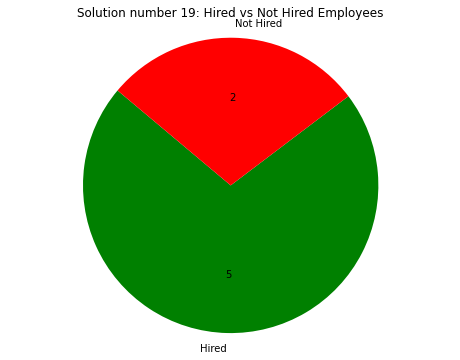

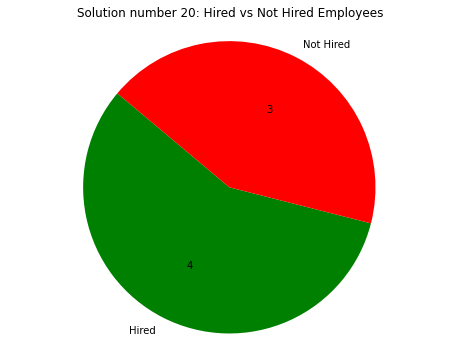

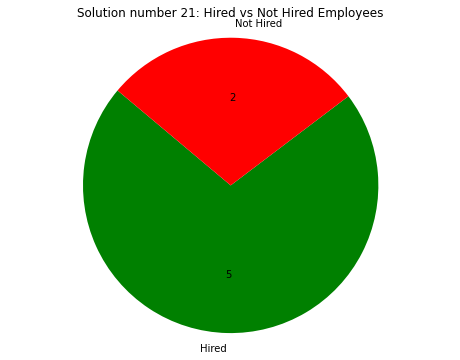

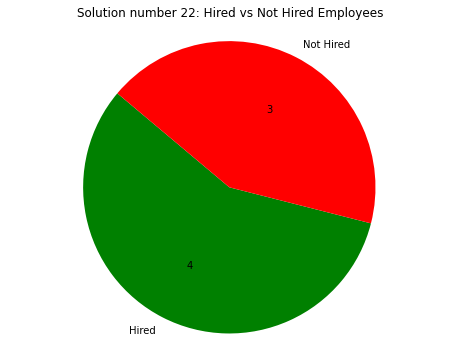

In [9]:
#GUI
root = tk.Tk()
root.title("Employee Combination Finder")

selected_data = tk.StringVar()
selected_data.set("Scene 1")

# Labels and Inputs
labels = ['Max Employees:', 'Python Programmers:', 'AI Engineers:', 'Web Designers:', 'Database Admins:', 'Systems Engineers:']
entries = []

for i, label_text in enumerate(labels):
    label = tk.Label(root, text=label_text)
    label.grid(row=i, column=0, padx=10, pady=5, sticky=tk.W)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

data_label = tk.Label(root, text="Choose Data:")
data_label.grid(row=len(labels) + 1, column=0, padx=10, pady=5, sticky=tk.W)

#Select button of the scenes
data_options = ["Scene 1", "Scene 2"]
data_menu = tk.OptionMenu(root, selected_data, *data_options)
data_menu.grid(row=len(labels) + 1, column=1, padx=10, pady=5)

# Button that calls the function to find a possible solution
button = tk.Button(root, text="Find Solutions", command=find_solutions)
button.grid(row=len(labels) + 2, columnspan=2, padx=10, pady=10)

# Result Display
result_text = tk.Text(root, height=10, width=40, wrap=tk.WORD)
result_text.grid(row=len(labels) + 3, columnspan=2, padx=10, pady=10)
result_text.config(state=tk.DISABLED)

#Scrollbar for the result_text
scrollbar = tk.Scrollbar(root, command=result_text.yview)
scrollbar.grid(row=len(labels) + 3, column=3, sticky='nse')
result_text.config(yscrollcommand=scrollbar.set)

def close_window():
    root.destroy()

root.protocol("WM_DELETE_WINDOW", close_window)
root.mainloop()


# Depth-First Search

In [10]:
class Person:
    def __init__(self, name, abilities):
        self.name = name
        self.abilities = abilities
        self.visited = False

def can_hire(people):
    required_roles = {
        'Python Programmer': 2,
        'AI Engineer': 2,
        'Web Designer': 1,
        'Database Admin': 1,
        'Systems Engineer': 1
    }

    roles_covered = {
        'Python Programmer': 0,
        'AI Engineer': 0,
        'Web Designer': 0,
        'Database Admin': 0,
        'Systems Engineer': 0
    }

    for person in people:
        for ability in person.abilities:
            if ability == 'Python':
                roles_covered['Python Programmer'] += 1
            elif ability == 'AI':
                roles_covered['AI Engineer'] += 1
            elif ability == 'Web':
                roles_covered['Web Designer'] += 1
            elif ability == 'Database':
                roles_covered['Database Admin'] += 1
            elif ability == 'Systems':
                roles_covered['Systems Engineer'] += 1

    for role, count in required_roles.items():
        if roles_covered[role] < count:
            return False
    return True

def dfs(people, hired, index, count):
    if count == 3:
        if can_hire(hired):
            for person in hired:
                print(person.name)
            return True
        return False

    for i in range(index, len(people)):
        if not people[i].visited:
            people[i].visited = True
            hired.append(people[i])
            if dfs(people, hired, i + 1, count + 1):
                return True
            hired.pop()
            people[i].visited = False

    return False

people = [
    Person('Peter', ['Python', 'AI']),
    Person('Juan', ['Web', 'AI']),
    Person('Jim', ['AI', 'Systems']),
    Person('Jane', ['Python', 'Database']),
    Person('Mary', ['Web', 'Systems']),
    Person('Bruce', ['Systems', 'Python']),
    Person('Anita', ['Web', 'AI'])
]

selected_people = []

dfs(people, selected_people, 0, 0)


False